In [1]:
import os
import xlrd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import datetime as dt
import copy
import matplotlib.dates as mdate
import scipy.optimize as spo
from scipy.stats import norm
import statsmodels.api as sm
import statsmodels.tsa.stattools as sts

In [2]:
path1='C:\\Users\\wuboyuan\\Desktop\\standard'
name1=os.listdir(path1)

In [3]:
name1

['FFBS_h.csv',
 'FFBS_theta.csv',
 'independent_h.csv',
 'independent_theta.csv',
 'random_h.csv',
 'random_theta.csv']

In [4]:
file={}
data={}
key=[]
data0={}
fre={}
for i in range(len(name1)):
    file[i]=os.path.join(path1,name1[i])
    data[name1[i][0:-4]]=pd.read_csv(file[i],header=None)
    key.append(name1[i][0:-4])
    data0[key[i]]=data[key[i]]

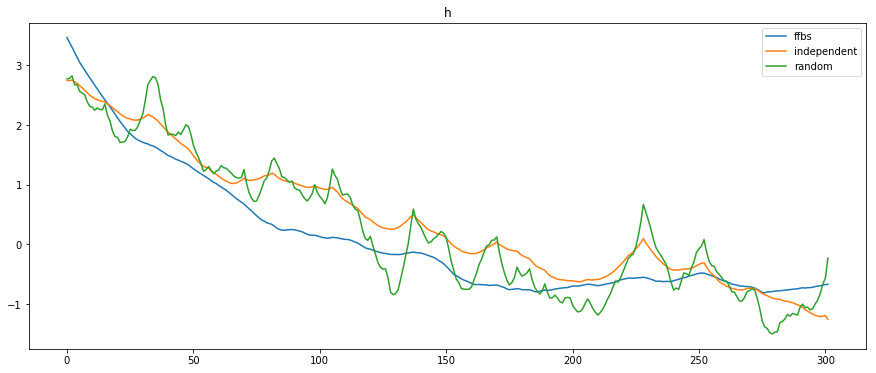

In [5]:
plt.figure(figsize=(15,6))
plt.plot(data0[key[0]][1:].mean(),label='ffbs')
plt.plot(data0[key[2]][1:].mean(),label='independent')
plt.plot(data0[key[4]][1:].mean(),label='random')
plt.title('h')
plt.legend()
plt.show()

In [6]:
import seaborn as sns

C:\Users\wuboyuan\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


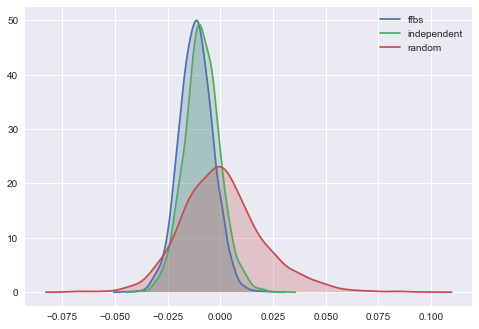

In [10]:
sns.kdeplot(data0[key[1]][1:][0],shade=True,label='ffbs')
sns.kdeplot(data0[key[3]][1:][0],shade=True,label='independent')
sns.kdeplot(data0[key[5]][1:][0],shade=True,label='random')
plt.show()

C:\Users\wuboyuan\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


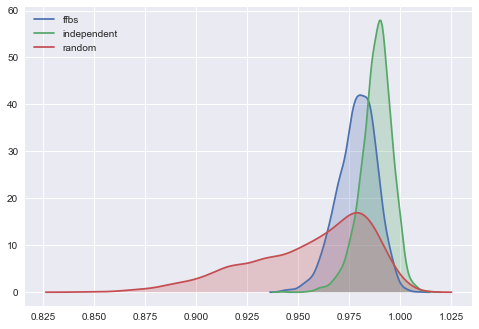

In [48]:
sns.kdeplot(data0[key[1]][1:][1],shade=True,label='ffbs')
sns.kdeplot(data0[key[3]][1:][1],shade=True,label='independent')
sns.kdeplot(data0[key[5]][1:][1],shade=True,label='random')
plt.show()

C:\Users\wuboyuan\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


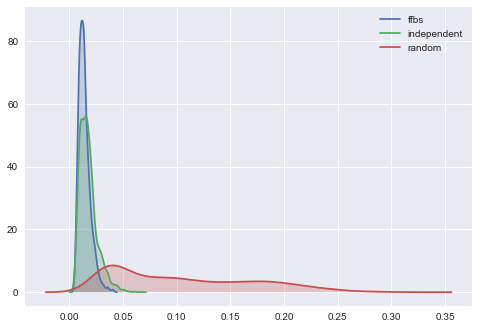

In [50]:
sns.kdeplot(data0[key[1]][1:][2],shade=True,label='ffbs')
sns.kdeplot(data0[key[3]][1:][2],shade=True,label='independent')
sns.kdeplot(data0[key[5]][1:][2],shade=True,label='random')
plt.show()

C:\Users\wuboyuan\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


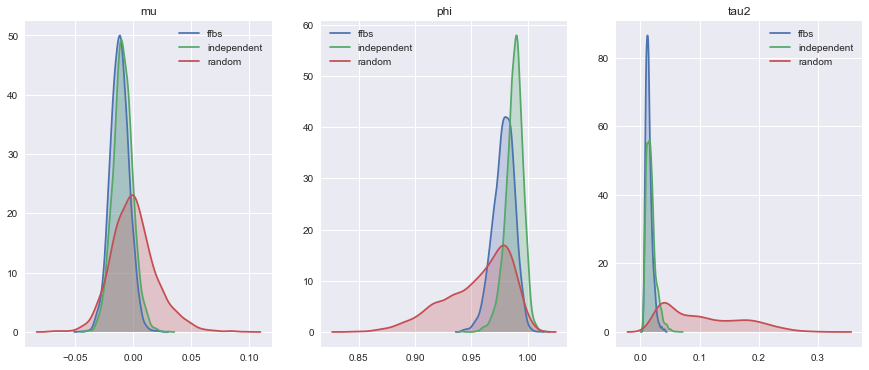

In [7]:
plt.figure(figsize=(15,6))
ax1=plt.subplot(131)
sns.kdeplot(data0[key[1]][1:][0],shade=True,label='ffbs',ax=ax1)
sns.kdeplot(data0[key[3]][1:][0],shade=True,label='independent',ax=ax1)
sns.kdeplot(data0[key[5]][1:][0],shade=True,label='random',ax=ax1)
plt.title('mu')
ax2=plt.subplot(132)
sns.kdeplot(data0[key[1]][1:][1],shade=True,label='ffbs',ax=ax2)
sns.kdeplot(data0[key[3]][1:][1],shade=True,label='independent',ax=ax2)
sns.kdeplot(data0[key[5]][1:][1],shade=True,label='random',ax=ax2)
plt.title('phi')
ax3=plt.subplot(133)
sns.kdeplot(data0[key[1]][1:][2],shade=True,label='ffbs',ax=ax3)
sns.kdeplot(data0[key[3]][1:][2],shade=True,label='independent',ax=ax3)
sns.kdeplot(data0[key[5]][1:][2],shade=True,label='random',ax=ax3)
plt.title('tau2')
plt.show()

In [20]:
sts.acf(data0[key[0]][1:],nlags=20)

ValueError: x must be 1d. Got 2 dims.

In [33]:
acf={}
for i in range(len(data0[key[0]][1:])):
    acf[i]=sts.acf(data0[key[0]][i+1:i+2],nlags=30)

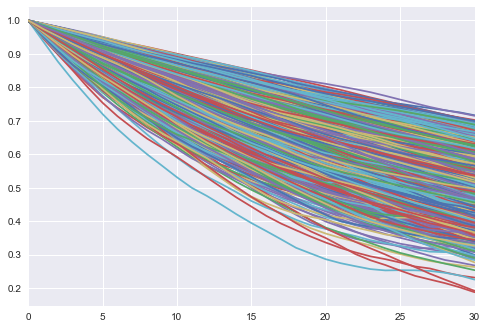

In [45]:
pd.DataFrame(acf).plot(legend =False)
plt.show()

In [47]:
acf0={}
for i in range(len(data0[key[0]][1:])):
    acf0[i]=sts.acf(data0[key[0]][i+1:i+2],nlags=30)

In [48]:
acf1={}
for i in range(len(data0[key[0]][1:])):
    acf1[i]=sts.acf(data0[key[2]][i+1:i+2],nlags=30)

In [49]:
acf2={}
for i in range(len(data0[key[0]][1:])):
    acf2[i]=sts.acf(data0[key[4]][i+1:i+2],nlags=30)

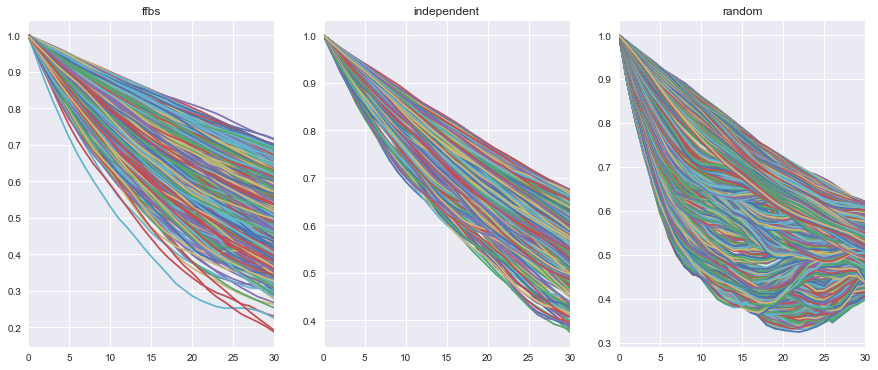

In [51]:
plt.figure(figsize=(15,6))
ax1=plt.subplot(131)
pd.DataFrame(acf0).plot(legend =False,ax=ax1,title='ffbs')
ax2=plt.subplot(132)
pd.DataFrame(acf1).plot(legend =False,ax=ax2,title='independent')
ax3=plt.subplot(133)
pd.DataFrame(acf2).plot(legend =False,ax=ax3,title='random')
plt.show()

In [64]:
data0[key[1]][1:].describe()

,0,1,2
count,2999.000000,2999.000000,2999.000000
mean,-0.011478,0.978667,0.014228
std,0.008113,0.009435,0.005508
min,-0.045570,0.942024,0.004926
25%,-0.016819,0.972741,0.010291
50%,-0.011531,0.979394,0.013225
75%,-0.006221,0.985287,0.016892
max,0.025228,1.008644,0.041286


In [62]:
data0[key[3]][1:].quantile(0.95)

0    0.005224
1    0.999687
2    0.034174
Name: 0.95, dtype: float64

In [60]:
data0[key[5]][1:].quantile(0.95)

0    0.036069
1    0.992019
2    0.221595
Name: 0.95, dtype: float64